In [1]:
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iclassdir = '/global/project/projectdirs/m1657/zfeng/cacti/arm/csapr/'
statsdir = f'{iclassdir}taranis_corcsapr2cfrppiqcM1_celltracking.c1.new/stats/'
datafile = f'{statsdir}csapr2_rainrate_pdf_20181015_20190303.nc'
figdir = f'{iclassdir}taranis_corcsapr2cfrppiqcM1_celltracking.c1.new/figures/celltrack_stats/'

In [3]:
ds = xr.open_dataset(datafile)
ds

<xarray.Dataset>
Dimensions:               (bin: 99)
Coordinates:
  * bin                   (bin) float64 0.1042 0.113 0.1225 ... 265.9 288.3
Data variables:
    hist_rain_total       (bin) float32 ...
    hist_rain_convective  (bin) float32 ...
    hist_rain_stratiform  (bin) float32 ...
    pdf_rain_total        (bin) float32 ...
    pdf_rain_convective   (bin) float32 ...
    pdf_rain_stratiform   (bin) float32 ...
Attributes:
    title:       CACTI CSAPR2 eastern domain precipitation PDF
    xmin_meter:  -25000
    xmax_meter:  110000
    contact:     Zhe Feng, zhe.feng@pnnl.gov
    created_on:  Wed Aug 18 10:25:26 2021

In [4]:
rr_bin_vals = ds.bin
hist_rain_total = ds.hist_rain_total
hist_rain_conv = ds.hist_rain_convective
hist_rain_strat = ds.hist_rain_stratiform
pdf_rain_total = ds.pdf_rain_total
pdf_rain_conv = ds.pdf_rain_convective
pdf_rain_strat = ds.pdf_rain_stratiform

In [5]:
rainamount_total = np.nansum(hist_rain_total * rr_bin_vals)
# rainfrac_conv = hist_rain_conv * rr_bin_vals / np.nansum(hist_rain_conv * rr_bin_vals)
# rainfrac_strat = hist_rain_strat * rr_bin_vals / np.nansum(hist_rain_strat * rr_bin_vals)
rainfrac_conv = hist_rain_conv * rr_bin_vals / np.nansum(rainamount_total)
rainfrac_strat = hist_rain_strat * rr_bin_vals / np.nansum(rainamount_total)

In [9]:
cdf_rainfrac_conv = np.cumsum(rainfrac_conv)
cdf_rainfrac_strat = np.cumsum(rainfrac_strat)

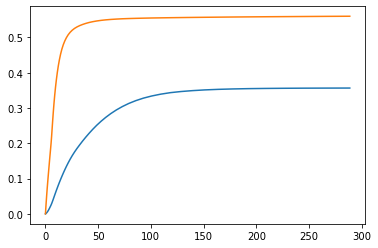

In [10]:
plt.plot(rr_bin_vals, cdf_rainfrac_conv)
plt.plot(rr_bin_vals, cdf_rainfrac_strat)

In [7]:
# plt.plot(rr_bin_vals, rainfrac_conv, color=colors['conv'], lw=3, label='Convective')
# plt.plot(rr_bin_vals, rainfrac_strat, color=colors['strat'], lw=3, label='Stratiform')
# plt.yscale('log')
# plt.xscale('log')

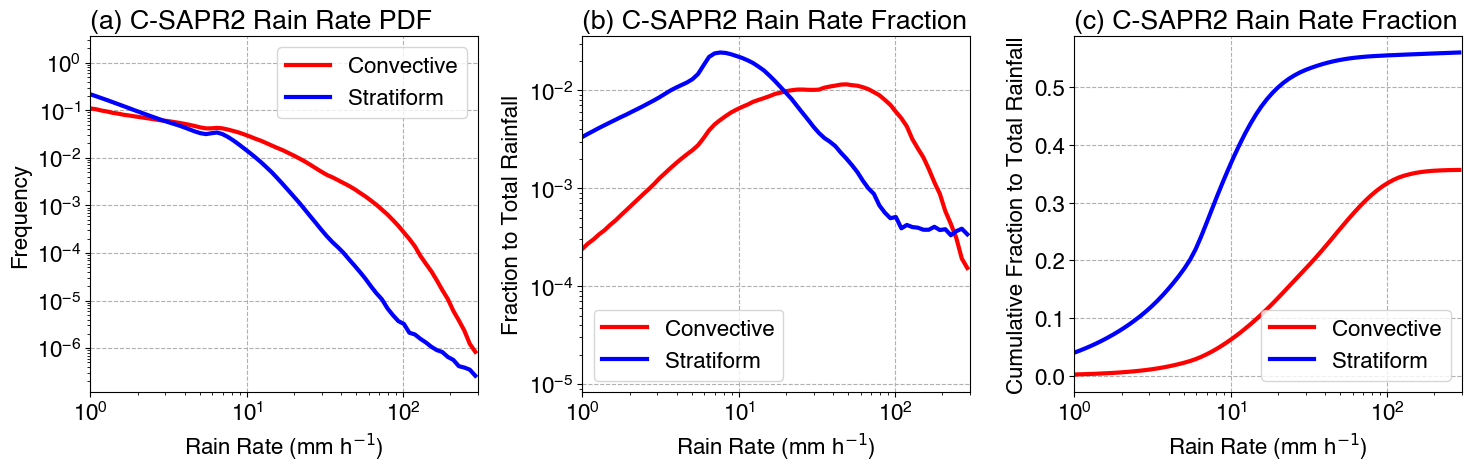

In [15]:
mpl.rcParams['font.size'] = 16
mpl.rcParams['font.family'] = 'Helvetica'
mpl.rcParams['figure.facecolor'] = 'white'
fig, axes = plt.subplots(1, 3, figsize=(15, 5), dpi=100)
colors = {'conv':'red', 'strat':'blue'}

xlims = (1, 300)

ax = axes[0]
ax.plot(rr_bin_vals, pdf_rain_conv, color=colors['conv'], lw=3, label='Convective')
ax.plot(rr_bin_vals, pdf_rain_strat, color=colors['strat'], lw=3, label='Stratiform')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(xlims[0], xlims[1])
ax.set_xlabel('Rain Rate (mm h$^{-1}$)')
ax.set_ylabel('Frequency')
ax.set_title('(a) C-SAPR2 Rain Rate PDF', loc='left')
ax.grid(ls='--')
ax.legend()

ax = axes[1]
ax.plot(rr_bin_vals, rainfrac_conv, color=colors['conv'], lw=3, label='Convective')
ax.plot(rr_bin_vals, rainfrac_strat, color=colors['strat'], lw=3, label='Stratiform')
# ax.plot(rr_bin_vals, cdf_rainfrac_conv, color=colors['conv'], lw=3, label='Convective')
# ax.plot(rr_bin_vals, cdf_rainfrac_strat, color=colors['strat'], lw=3, label='Stratiform')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(xlims[0], xlims[1])
ax.set_xlabel('Rain Rate (mm h$^{-1}$)')
ax.set_ylabel('Fraction to Total Rainfall')
# ax.set_ylabel('Cumulative Fraction to Total Rainfall')
ax.set_title('(b) C-SAPR2 Rain Rate Fraction', loc='left')
ax.legend()
ax.grid(ls='--')

ax = axes[2]
# ax.plot(rr_bin_vals, rainfrac_conv, color=colors['conv'], lw=3, label='Convective')
# ax.plot(rr_bin_vals, rainfrac_strat, color=colors['strat'], lw=3, label='Stratiform')
ax.plot(rr_bin_vals, cdf_rainfrac_conv, color=colors['conv'], lw=3, label='Convective')
ax.plot(rr_bin_vals, cdf_rainfrac_strat, color=colors['strat'], lw=3, label='Stratiform')
# ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(xlims[0], xlims[1])
ax.set_xlabel('Rain Rate (mm h$^{-1}$)')
# ax.set_ylabel('Fraction to Total Rainfall')
ax.set_ylabel('Cumulative Fraction to Total Rainfall')
ax.set_title('(c) C-SAPR2 Rain Rate Fraction', loc='left')
ax.legend()
ax.grid(ls='--')

fig.tight_layout()
figname = f'{figdir}rainrate_pdf_conv_strat_fullcampaign.png'
fig.savefig(figname, bbox_inches='tight', dpi=300, facecolor='w')